In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from a345_utilities import print_header, mem_usage     
from matplotlib.patches import Rectangle as rect 
import numpy as np
import os, time
from photutils import DAOStarFinder
from astropy.stats import mad_std
from photutils import aperture_photometry, CircularAperture
from a345_utilities import print_header 
from photutils import DAOStarFinder
from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
from astropy.coordinates import SkyCoord
from photutils import CircularAnnulus
from scipy.optimize import curve_fit
from astropy.modeling import models, fitting
from astropy.time import Time
import re
import warnings
warnings.filterwarnings('ignore')
from astropy.stats import sigma_clipped_stats
import pandas as pd
from astroquery.astrometry_net import AstrometryNet
from astroquery.exceptions import TimeoutError
plt.style.use('report.mplstyle')

/var/folders/tn/fqh6631n3p56r504tcsqvss00000gn/T/ipykernel_2303/2508782109.py:10: DeprecationWarning: `photutils.DAOStarFinder` is a deprecated alias for `photutils.detection.DAOStarFinder` and will be removed in the future. Instead, please use `from photutils.detection import DAOStarFinder` to silence this warning.
  from photutils import DAOStarFinder
/var/folders/tn/fqh6631n3p56r504tcsqvss00000gn/T/ipykernel_2303/2508782109.py:12: DeprecationWarning: `photutils.aperture_photometry` is a deprecated alias for `photutils.aperture.aperture_photometry` and will be removed in the future. Instead, please use `from photutils.aperture import aperture_photometry` to silence this warning.
  from photutils import aperture_photometry, CircularAperture
/var/folders/tn/fqh6631n3p56r504tcsqvss00000gn/T/ipykernel_2303/2508782109.py:12: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please us

cal_star_10_R_airmass.csv


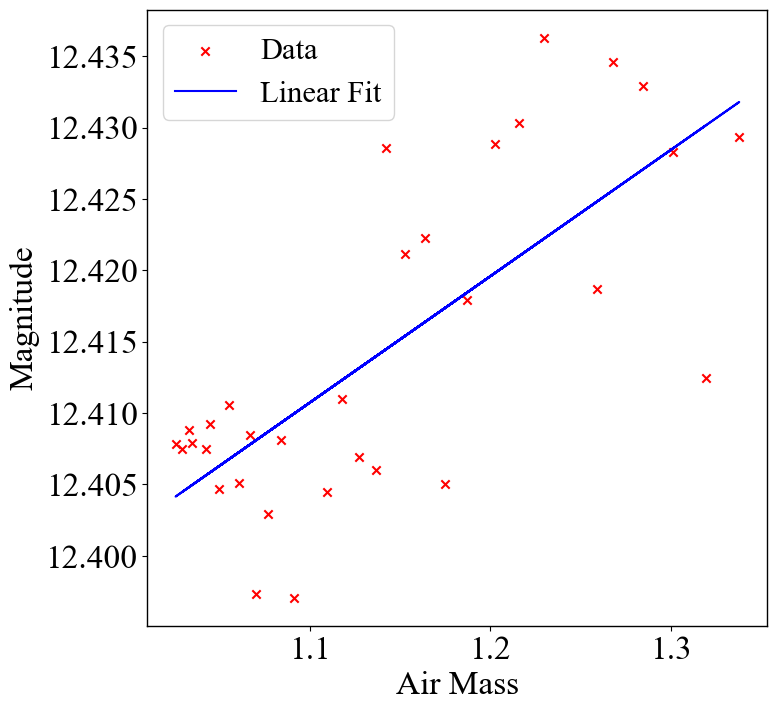

file cal_star_10_R_airmass.csv
params [ 0.08869234 12.31316396] [0.0147209  0.01684592]
cal_star_29_R_airmass.csv
file cal_star_29_R_airmass.csv
params [ 0.08869234 12.31316396] [0.0147209  0.01684592]
cal_star_14_R_airmass.csv
file cal_star_14_R_airmass.csv
params [ 0.08869234 12.31316396] [0.0147209  0.01684592]
cal_star_8_R_airmass.csv
file cal_star_8_R_airmass.csv
params [ 0.08869234 12.31316396] [0.0147209  0.01684592]
cal_star_13_R_airmass.csv
file cal_star_13_R_airmass.csv
params [ 0.08869234 12.31316396] [0.0147209  0.01684592]
cal_star_17_R_airmass.csv
file cal_star_17_R_airmass.csv
params [ 0.08869234 12.31316396] [0.0147209  0.01684592]
cal_star_24_R_airmass.csv
file cal_star_24_R_airmass.csv
params [ 0.08869234 12.31316396] [0.0147209  0.01684592]
cal_star_19_R_airmass.csv
file cal_star_19_R_airmass.csv
params [ 0.08869234 12.31316396] [0.0147209  0.01684592]
cal_star_20_R_airmass.csv
file cal_star_20_R_airmass.csv
params [ 0.08869234 12.31316396] [0.0147209  0.01684592]
ca

In [4]:
ext_coef = []
def linear(x,m,c):
    return m*x+c
counter = 0
for i in np.arange(len(os.listdir('airmass/NSVS7293918/R'))):
    list = os.listdir('airmass/NSVS7293918/R')
    df = pd.read_csv('airmass/NSVS7293918/R/'+list[9])
    average = np.mean(df['Mag'])
    print(list[i])
    for j in np.arange(len(df['Mag'])):
        check_mag = df['Mag'][j]-average
        if abs(check_mag) > 0.1:
            df = df.drop(j)
        
    if len(df['Mag']) < 3:
        continue

    popt, pcov = curve_fit(linear, df['Air Mass'], df['Mag'])
    if popt[0] < 0:
        continue
    if counter == 0:
        plt.figure(figsize=(8,8))
        plt.scatter(df['Air Mass'], df['Mag'], color = 'red', label = 'Data',marker='x')
        plt.xlabel('Air Mass')
        plt.ylabel('Magnitude')
        plt.plot(df['Air Mass'], linear(df['Air Mass'], *popt), color = 'blue', label = 'Linear Fit')
        plt.legend( loc='upper left', fontsize = 22)
        plt.savefig('graphs/'+list[i]+'.pdf', bbox_inches='tight', pad_inches=0.1)
        plt.show()
        counter += 1
    ext_coef.append(popt[0])
    print('file',list[i])
    print('params',popt, np.sqrt(np.diag(pcov)))

In [5]:
print('extinction coefficient',np.mean(ext_coef), '±' , np.mean(ext_coef)/1.8*np.mean(np.sqrt(np.diag(pcov))))

extinction coefficient 0.08869233684553203 ± 0.0007777040377878339


NSVS7293918_LIGHT_2024-02-01T21-47-39Z_Chr-G_120s_-10.0C_W_0027.fits_c.fits
29 13 08.67 07 44 41.636
 id xcentroid ycentroid sharpness  ... sky    peak      flux        mag      
--- --------- --------- ---------- ... --- --------- --------- --------------
325 1.5807169 997.41991 0.22997591 ...   0 32800.518 1118.2123     -7.6213107
  1 1.5802478 1.5801763 0.23013439 ...   0 32803.014 1118.2042     -7.6213028
  2 997.41934 1.5804933  0.2299919 ...   0  32794.88 1117.8862      -7.620994
326 997.41978 997.41907  0.2299351 ...   0 32792.215 1117.8308     -7.6209401
154 509.14466  475.4488  0.4465342 ...   0  51033.52 562.47966     -6.8752671
 98 245.49333  298.4435 0.43533388 ...   0 45138.569 379.16751     -6.4470778
201 352.48497 595.30556 0.45910272 ...   0 43553.669 325.59006     -6.2816778
222 543.77376 668.86602 0.43370598 ...   0 39889.534 226.35935     -5.8869961
230 871.55799 680.69145 0.46130748 ...   0 38131.637 162.89996     -5.5298024
226 467.78741 674.84284  0.4430698 ...   

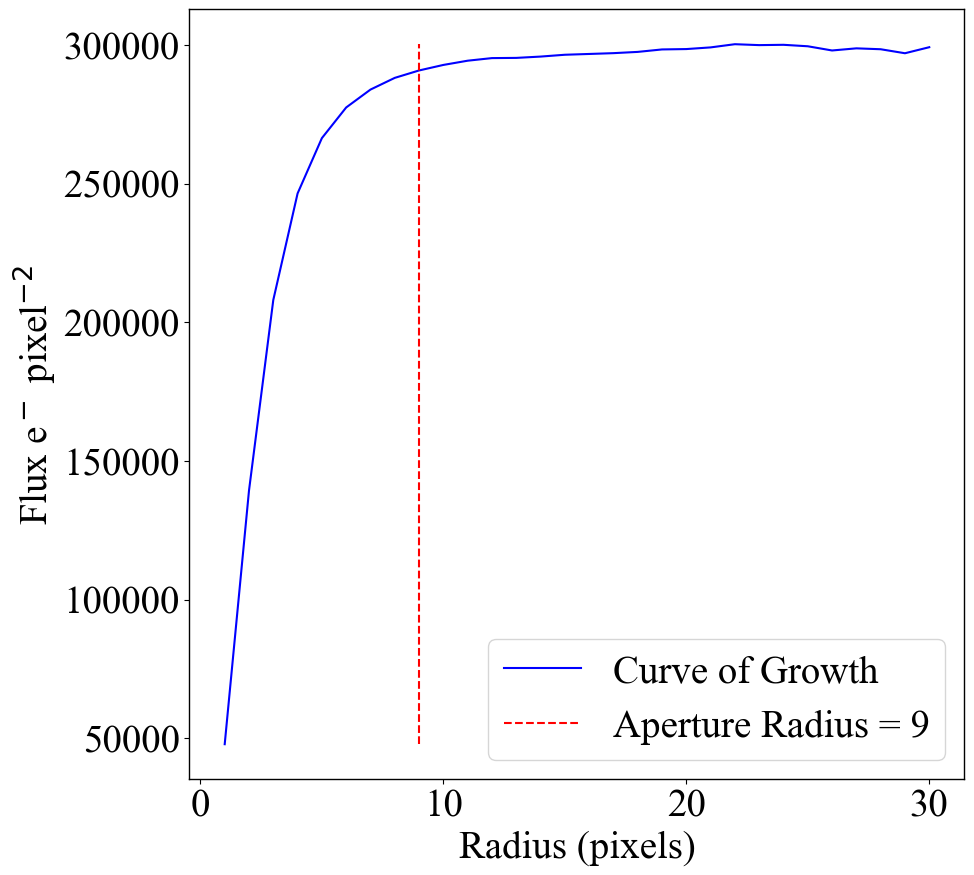

NSVS7293918_LIGHT_2024-02-01T21-01-57Z_Chr-G_120s_-10.0C_W_0017.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T19-50-02Z_Chr-G_120s_-9.9C_W_0001.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T22-15-51Z_Chr-G_120s_-10.0C_W_0033.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T21-38-54Z_Chr-G_120s_-10.0C_W_0025.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T19-58-46Z_Chr-G_120s_-10.0C_W_0003.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T21-25-47Z_Chr-G_120s_-9.9C_W_0022.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T21-15-04Z_Chr-G_120s_-10.0C_W_0020.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T22-20-14Z_Chr-G_120s_-10.0C_W_0034.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T20-29-21Z_Chr-G_120s_-10.0C_W_0010.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T20-11-53Z_Chr-G_120s_-10.0C_W_0006.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T21-56-22Z_Chr-G_120s_-10.0C_W_0029.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T22-07-07Z_Chr-G_120s_-10.0C_W_0031.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T20-16-15Z_Chr-G_120s_-10.0C_W_0007.fits_c.fits


KeyboardInterrupt: 

In [3]:
from photometry import photometry
photometry('NSVS7293918','Chr G', 9, 4,False)

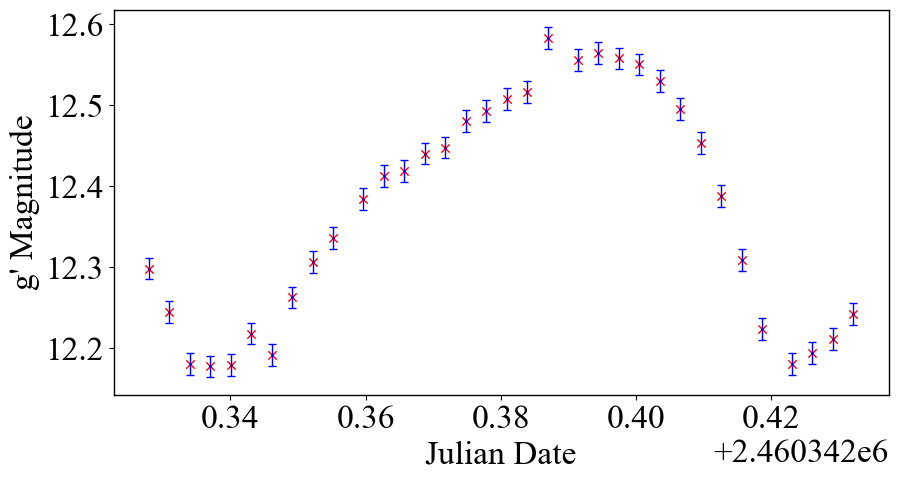

In [7]:

df = pd.read_csv('airmass/NSVS7293918/R/cal_star_4_R_airmass.csv')
data= np.loadtxt('data/NSVS7293918_R.txt',skiprows = 1, delimiter = ',')
Julian = data[:,0]
MAg = data[:,1]
plt.figure(figsize =(10,5))
plt.xlabel('Julian Date')
plt.ylabel('g\' Magnitude')
plt.errorbar(df['JD'], df['Mag'], yerr = df['error'], color = 'b',fmt='o',markersize = 0.5, capsize=3,linewidth = 1)
plt.scatter(df['JD'], df['Mag'], color = 'r',marker = 'x' ,linewidth = 1)
plt.savefig('graphs/lightcurve_r.pdf', format = 'pdf',bbox_inches='tight',pad_inches=0.3)
plt.show()


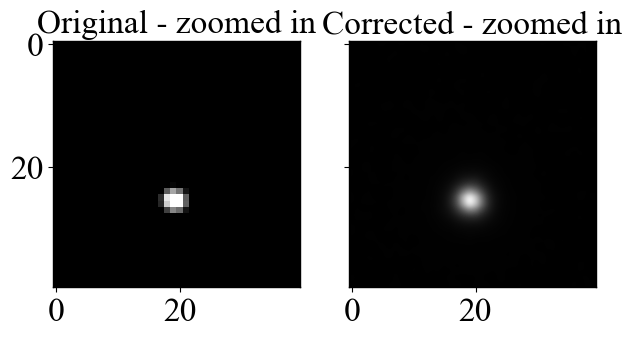

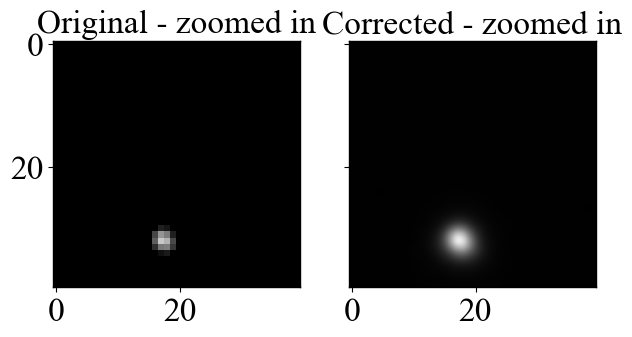

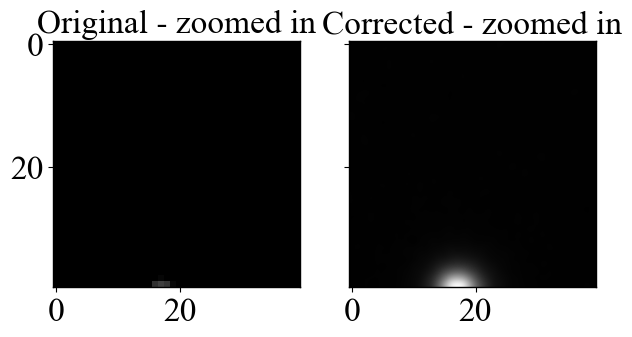

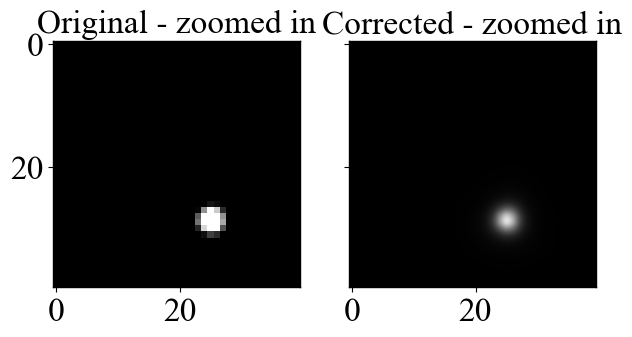

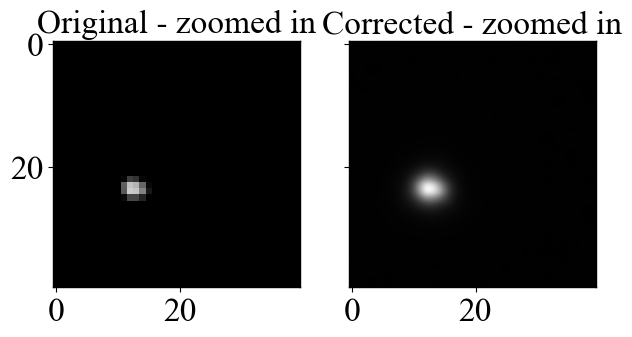

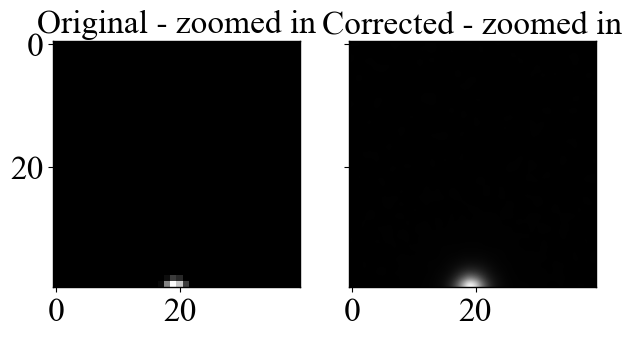

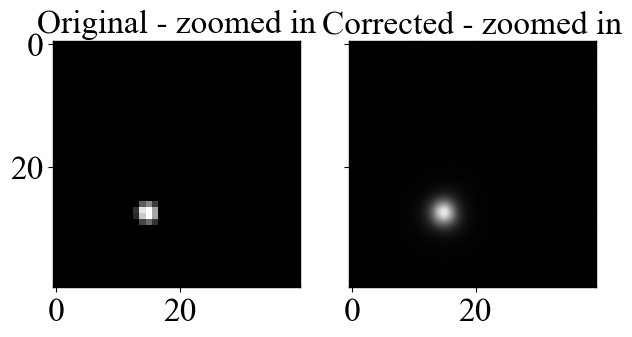

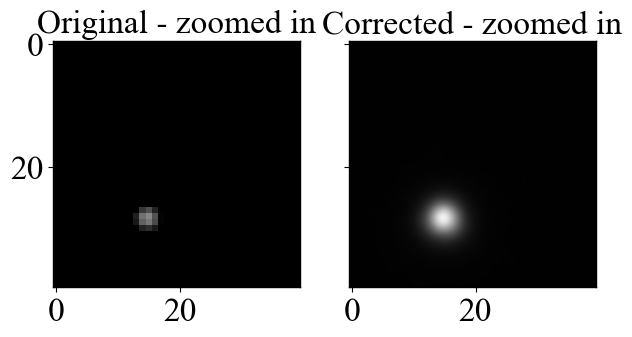

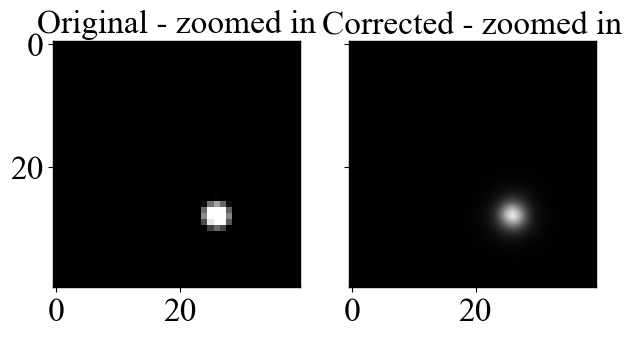

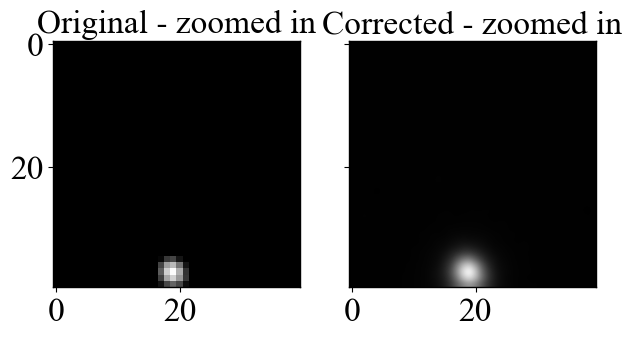

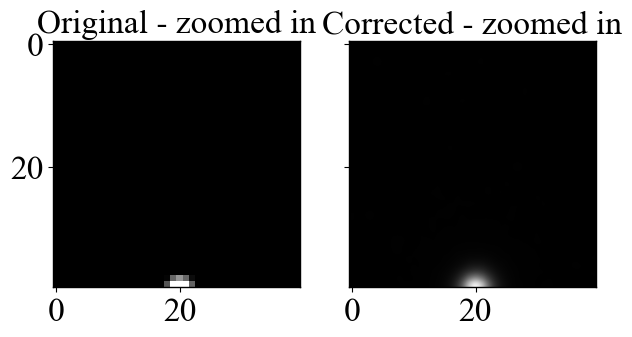

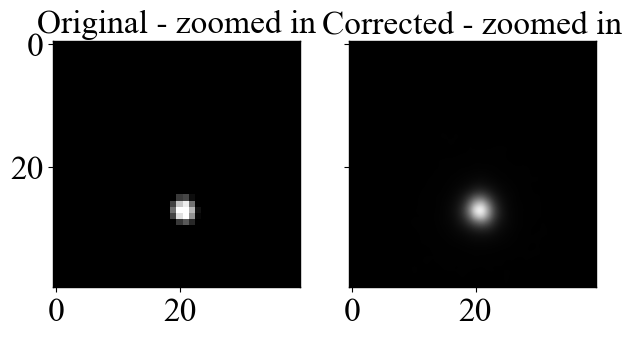

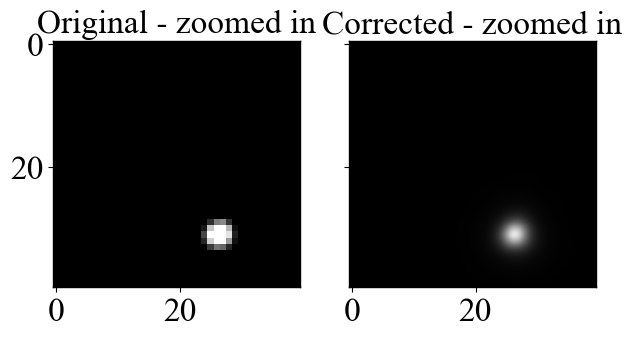

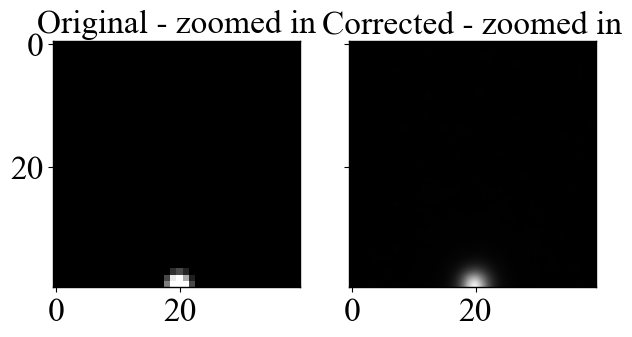

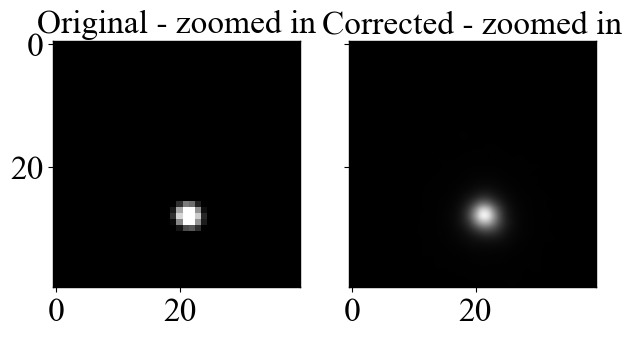

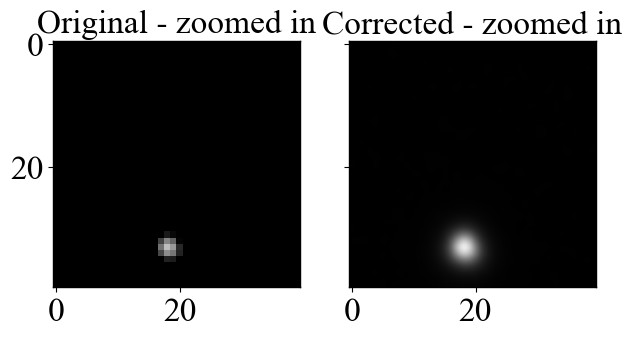

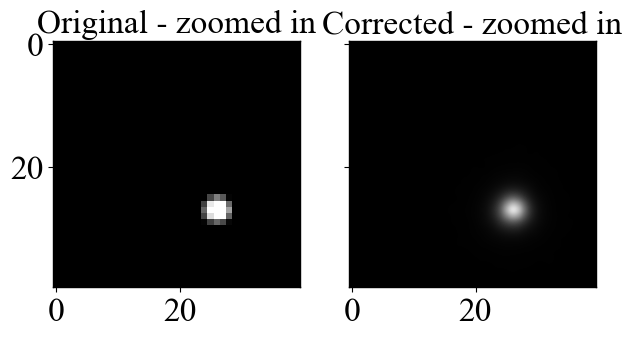

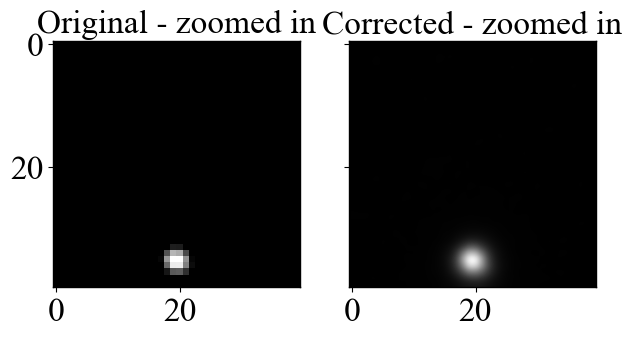

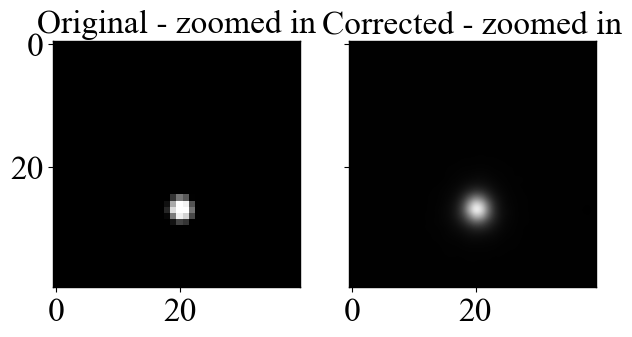

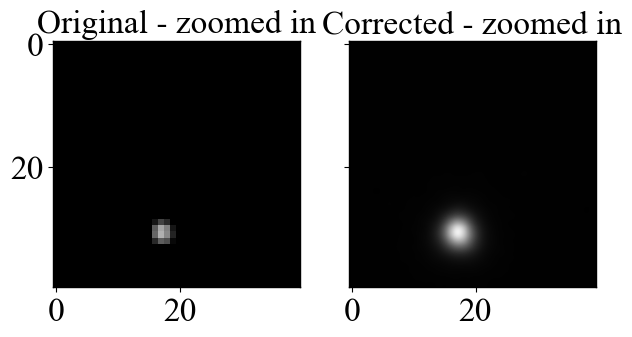

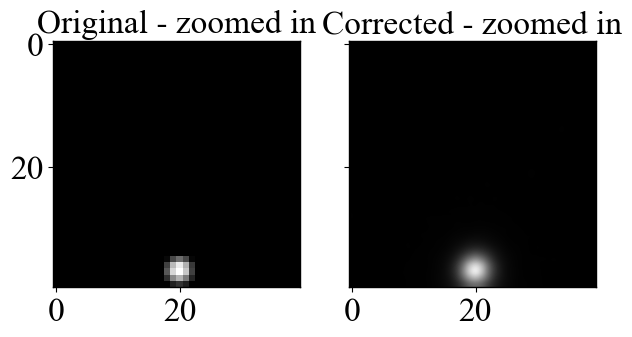

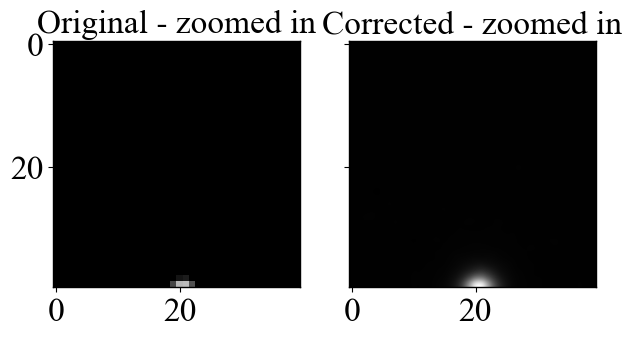

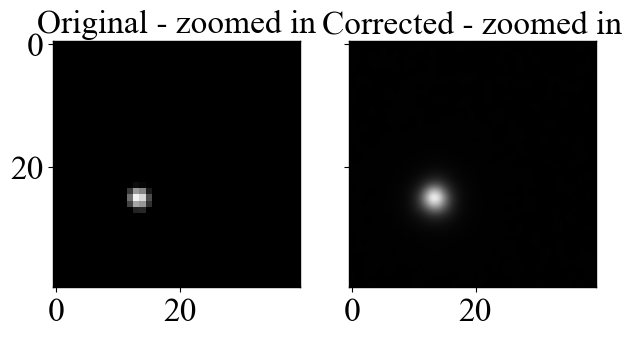

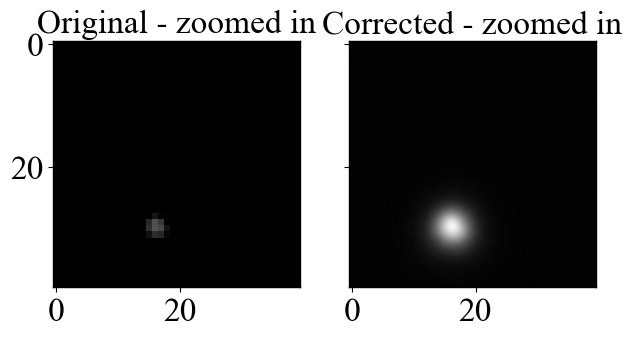

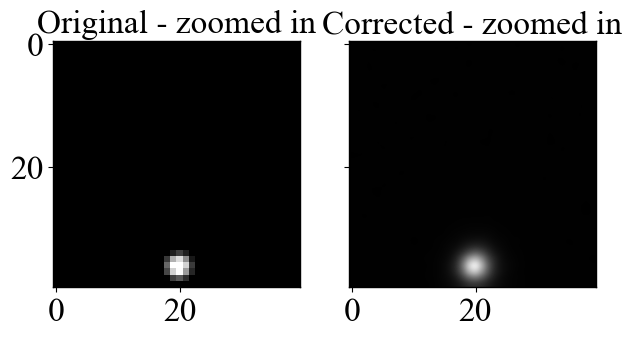

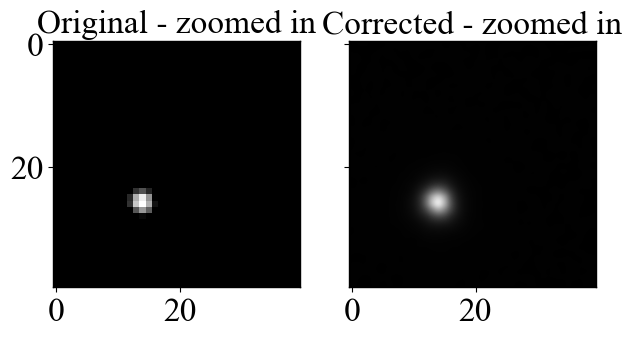

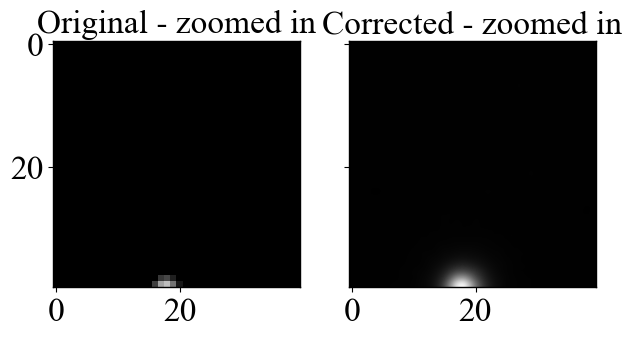

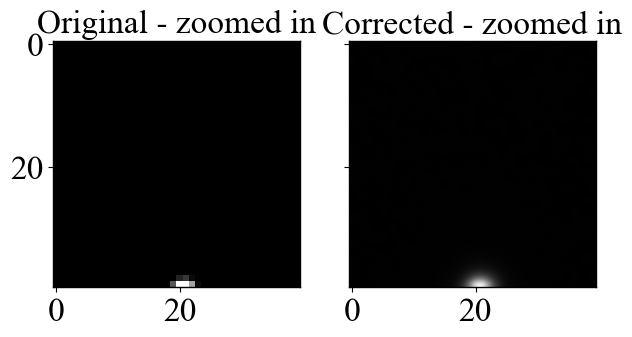

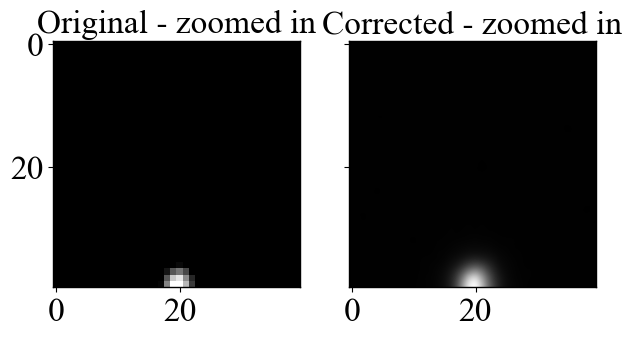

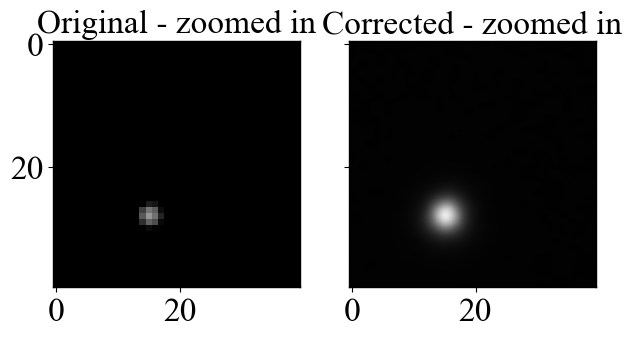

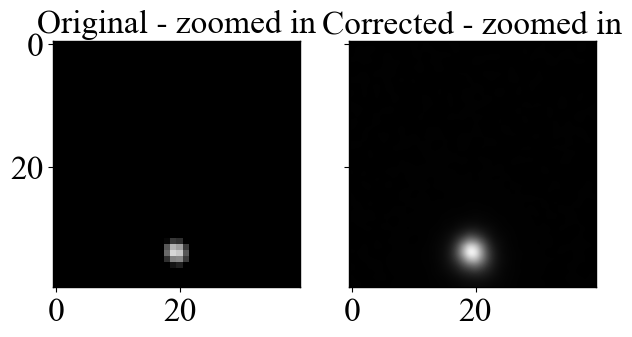

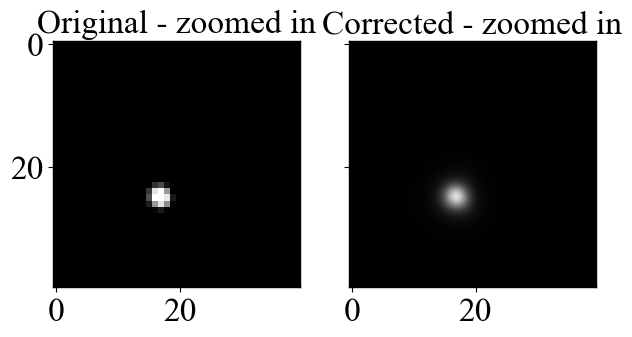

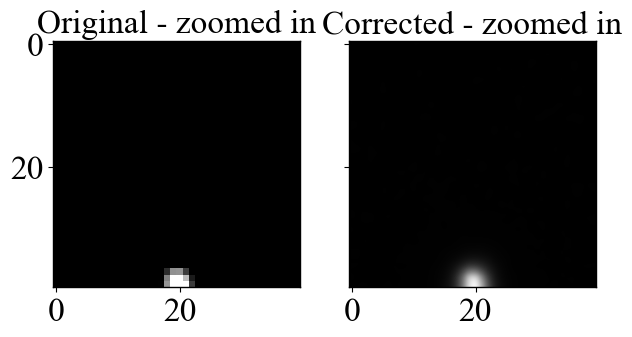

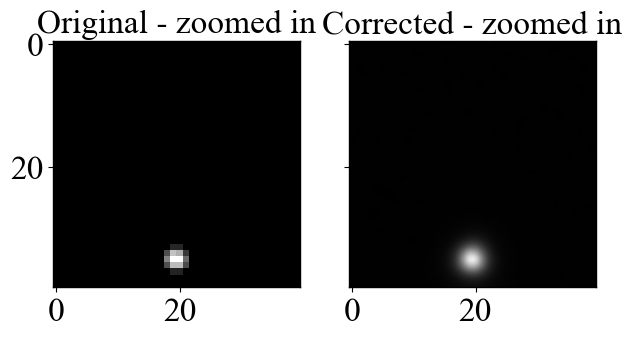

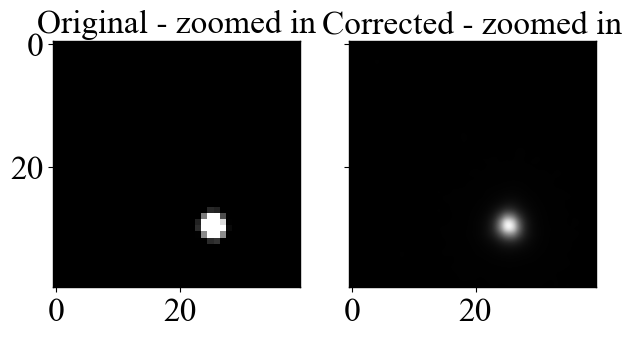

In [8]:
file = 'SX-UMa_LIGHT_2024-04-09T19-57-42Z_Chr-G_60s_-10.0C_W_0001.fits_c.fits'
data_path = '/Volumes/external_2T/corrected/wcs/NSVS7293918/Chr G/'
cal_path = '/Volumes/external_2T/calibration/2023-10/neg10c/master/'
list = os.listdir(data_path)
for i in np.arange(len(list)):
    with fits.open(cal_path + 'flat_i_master.fits') as hdu:
        flat_i = hdu[0].data
    with fits.open(cal_path + 'flat_g_master.fits') as hdu:
        flat_g = hdu[0].data
    with fits.open(cal_path + 'flat_r_master.fits') as hdu:
        flat_r = hdu[0].data
    with fits.open(cal_path + 'dark_flat_gr_3s_master.fits') as hdu:
        flat_dark = hdu[0].data
        
        avg_flat_dark = np.mean(flat_g-flat_dark)
    with fits.open(cal_path + 'dark_' + '10s' + '_master.fits') as hdu:
        dark = hdu[0].data

    with fits.open(data_path + list[i]) as hdu:
        data = hdu[0].data
        header = hdu[0].header


    # plt.figure(figsize=(20,10))
    # plt.subplot(1,2, 1)
    # plt.imshow(data, cmap='gray', origin='lower')
    # plt.subplot(1,2,2)
    # plt.imshow(data, cmap='gray', origin='lower')
    # plt.show()

    bias_min = 395; bias_max = 410
    dark_min = 395; dark_max = 410
    flat_min = 39000; flat_max = 40100
    nbins = 40

    # f1, (ax_bias, ax_dark, ax_flat) = plt.subplots(1, 3, sharey=True, figsize=(20,8))
    # plot_bias = ax_bias.imshow(flat_dark, vmin = bias_min, vmax=bias_max, cmap='gray')
    # plot_dark = ax_dark.imshow(dark, vmin = dark_min, vmax=dark_max, cmap='gray')
    # plot_flat = ax_flat.imshow(flat_g, vmin = flat_min, vmax=flat_max, cmap='gray')
    # ax_bias.set_title('Bias frame')
    # ax_dark.set_title('Dark frame')
    # ax_flat.set_title('Flat frame')

    # p=[800,800]                   
    # w=100; h=60

    # f2, (ax_bias_sub, ax_dark_sub, ax_flat_sub) = plt.subplots(1, 3, sharey=True, figsize=(20,8))
    # #f2, (ax_bias_sub, ax_dark_sub, ax_flat_sub) = plt.subplots(1, 3, sharey=True)

    # ax_bias_sub.imshow(flat_dark[p[1]:p[1]+h,p[0]:p[0]+w], vmin = bias_min, vmax=bias_max, cmap='gray', interpolation="none")
    # ax_dark_sub.imshow(dark[p[1]:p[1]+h,p[0]:p[0]+w], vmin = dark_min, vmax=dark_max, cmap='gray', interpolation="none")
    # ax_flat_sub.imshow(flat_g[p[1]:p[1]+h,p[0]:p[0]+w], vmin = flat_min, vmax=flat_max, cmap='gray', interpolation="none")


    # f3, (ax_bias_hist, ax_dark_hist, ax_flat_hist) = plt.subplots(1, 3, sharey=True, figsize=(20,6))
    # #f3, (ax_bias_hist, ax_dark_hist, ax_flat_hist) = plt.subplots(1, 3, sharey=True)

    # ax_bias_hist.hist(flat_dark.flatten(), bins=nbins, range=(bias_min, bias_max), fc='k', ec='k');
    # ax_dark_hist.hist(dark.flatten(), bins=nbins, range=(dark_min, dark_max), fc='k', ec='k');
    # ax_flat_hist.hist(flat_g.flatten(), bins=40, range=(flat_min, flat_max), fc='k', ec='k');


    a=450
    b=490
    c=490
    d=530
    image_data_corrected_sub = data[a:b, c:d]
    image_data_sub = data[a:b,c:d]

    cmin_raw = 37000; cmax_raw = 47000

    cmin_corrected = 0; cmax_corrected = 470000


    fig1, (ax_raw, ax_corrected) = plt.subplots(1,2, sharey=True, figsize=(7,4))

    ax_raw.set_title('Original - zoomed in')
    ax_corrected.set_title('Corrected - zoomed in')
    ax_raw.imshow(image_data_sub,  vmin = cmin_raw, vmax=cmax_raw, cmap='gray', interpolation='none')#, vmin = cmin_corrected, vmax=cmax_corrected
    ax_corrected.imshow(image_data_corrected_sub, cmap='gray',interpolation='quadric')#, vmin = cmin_corrected, vmax=cmax_corrected

        

In [9]:
space_mag = []
df = pd.read_csv('airmass/NSVS7293918/R/cal_star_4_R_airmass.csv')
for i in np.arange(len(df['Mag'])):
    space_mag.append(df['Mag'][i]-df['extinction'][0]*df['Air Mass'][i])


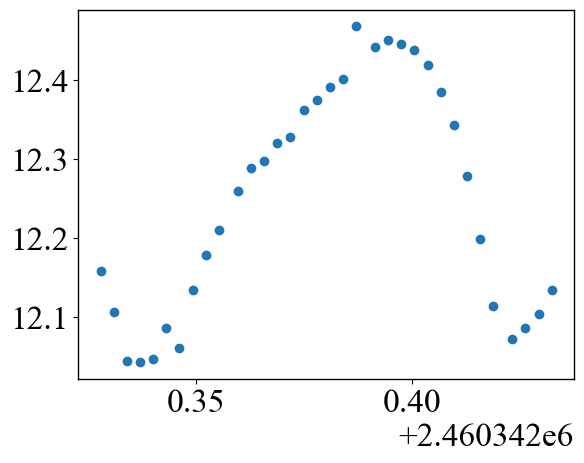

In [10]:
plt.scatter(df['JD'], space_mag)

In [11]:
df.insert(2, 'Space Mag', space_mag)
df.to_csv('airmass/NSVS7293918/R/cal_star_4_R_airmass.csv',index = False,)

ValueError: cannot insert Space Mag, already exists

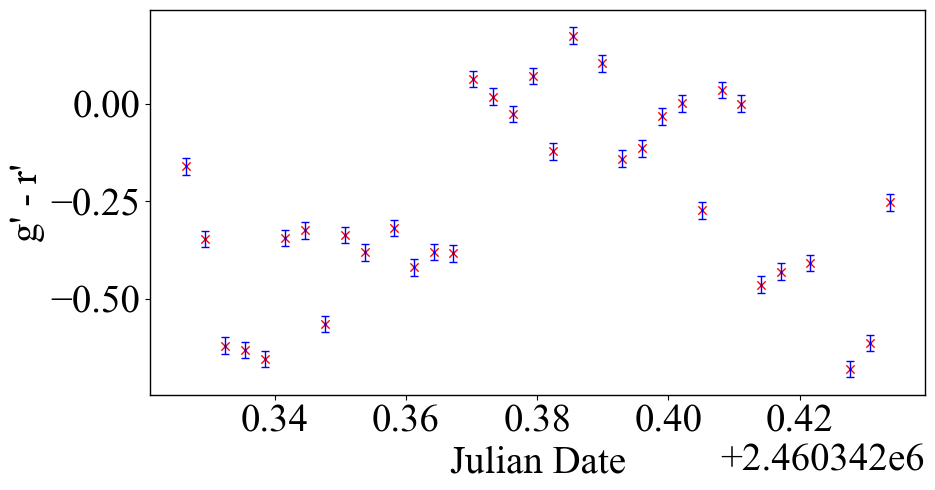

In [5]:
g = pd.read_csv('airmass/NSVS7293918/G/cal_star_4_G_airmass.csv')
r = pd.read_csv('airmass/NSVS7293918/R/cal_star_4_R_airmass.csv')

index_g = np.argsort(g['JD'])
index_r = np.argsort(r['JD'])


gmag = g['Space Mag'][index_g]

rmag = r['Space Mag'][index_r]
colour = gmag - rmag
tot_error = np.sqrt(g['error'][index_g]**2 + r['error'][index_r]**2+g['extinction error'][0]**2 + r['extinction error'][0]**2)
def sin(x, a, b, c):
    return a*np.sin(b*x+c)
# popt, pcov = curve_fit(sin, g['JD'][0:34], colour[0:34], p0 = [0.0002, -0.002, 0.3],maxfev = 1000000)

plt.figure(figsize=(10,5))
plt.xlabel('Julian Date')
plt.ylabel('g\' - r\'')
plt.errorbar(g['JD'][0:34], colour[0:34], yerr = tot_error[0:34], color = 'b',fmt='o',markersize = 0.5, capsize=3,linewidth = 1)
plt.scatter(g['JD'][0:34], colour[0:34], color = 'r',marker = 'x' ,linewidth = 1)

plt.savefig('graphs/colour.pdf', format = 'pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

dic = {'JD':g['JD'][0:34], 'Colour':colour[0:34], 'Error':tot_error[0:34]}

df = pd.DataFrame(dic)
df.to_csv('airmass/NSVS7293918/colour/colour.csv',index = False,)


In [3]:
df = pd.read_csv('airmass/NSVS7293918/colour/colour.csv')
print(df['Colour'])

0     0.035442
1    -0.025508
2    -0.159917
3    -0.679576
4     0.001860
5    -0.620013
6    -0.140718
7     0.175362
8    -0.612832
9    -0.380983
10   -0.343484
11   -0.463773
12   -0.408333
13   -0.324162
14   -0.429807
15    0.018594
16   -0.252744
17   -0.379610
18    0.000407
19    0.071289
20   -0.318037
21   -0.630777
22   -0.031690
23   -0.121456
24   -0.419529
25   -0.114151
26   -0.346649
27   -0.653881
28   -0.564498
29    0.103738
30    0.063570
31   -0.273258
32   -0.336313
33   -0.383491
Name: Colour, dtype: float64


In [4]:
df = pd.read_csv('airmass/NSVS7293918/colour/colour.csv')
print(df['Colour'])
Temperature = []

for i in np.arange(len(df['JD'])):
    Temperature.append((1.09/(df['Colour'][i]+1.47))*1e4)
    
dic = {'JD':df['JD'], 'Temperature':Temperature, 'Error':df['Error'], 'Colour':df['Colour']}

data = pd.DataFrame(dic)
data.to_csv('airmass/NSVS7293918/colour/temperature.csv',index = False,)


0     0.035442
1    -0.025508
2    -0.159917
3    -0.679576
4     0.001860
5    -0.620013
6    -0.140718
7     0.175362
8    -0.612832
9    -0.380983
10   -0.343484
11   -0.463773
12   -0.408333
13   -0.324162
14   -0.429807
15    0.018594
16   -0.252744
17   -0.379610
18    0.000407
19    0.071289
20   -0.318037
21   -0.630777
22   -0.031690
23   -0.121456
24   -0.419529
25   -0.114151
26   -0.346649
27   -0.653881
28   -0.564498
29    0.103738
30    0.063570
31   -0.273258
32   -0.336313
33   -0.383491
Name: Colour, dtype: float64


In [ ]:
# print(np.array(Temperature).transpose())

[ 7240.39622032  7545.90375897  8320.08396292 13790.06047894
  7405.59507279 12823.73039498  8199.91568138  6624.68351359
 12716.29207548 10009.02267185  9675.85348117 10832.54324604
 10266.87307068  9512.69095867 10478.82410896  7322.34685954
  8954.56845955  9996.4244691   7412.91558346  7072.00229974
  9462.10903125 12988.21027355  7578.34089003  8082.79394675
 10376.29525234  8039.2416066   9703.10797455 13355.89757665
 12037.5164084   6926.18506905  7107.59871104  9108.05930481
  9614.64721539 10032.12994536]


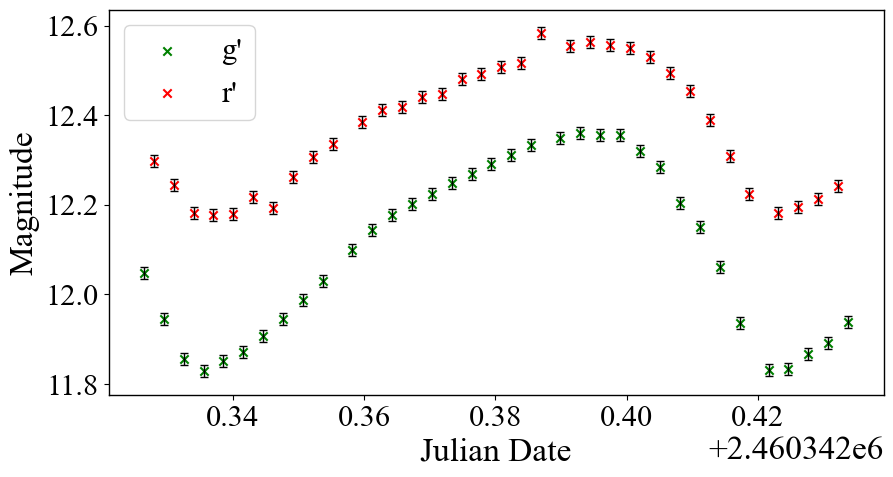

In [ ]:
gdata = pd.read_csv('airmass/NSVS7293918/G/cal_star_4_G_airmass.csv')
rdata = pd.read_csv('airmass/NSVS7293918/R/cal_star_4_R_airmass.csv')

plt.figure(figsize=(10,5))
plt.xlabel('Julian Date')
plt.ylabel('Magnitude')
plt.scatter(gdata['JD'], gdata['Mag'], color = 'g', label = 'g\'',marker='x')
plt.errorbar(rdata['JD'], rdata['Mag'], yerr = rdata['error'], color = 'k',fmt='o',markersize = 0.5, capsize=3,linewidth = 1)
plt.errorbar(gdata['JD'], gdata['Mag'], yerr = gdata['error'], color = 'k',fmt='o',markersize = 0.5, capsize=3,linewidth = 1)
plt.scatter(rdata['JD'], rdata['Mag'], color = 'r', label = 'r\'',marker='x')
plt.legend( loc='upper left', fontsize = 22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.savefig('graphs/magnitude.pdf', format = 'pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()


[  0.26787494 160.00003378   0.8407345   45.10693318]
[ 0.25215745 65.10000045  0.69151428 47.8075843 ]
[ 0.34066465 38.00000005  0.724734   35.28029979]
[  0.26149673 100.00000086   1.29948928  46.20225691]


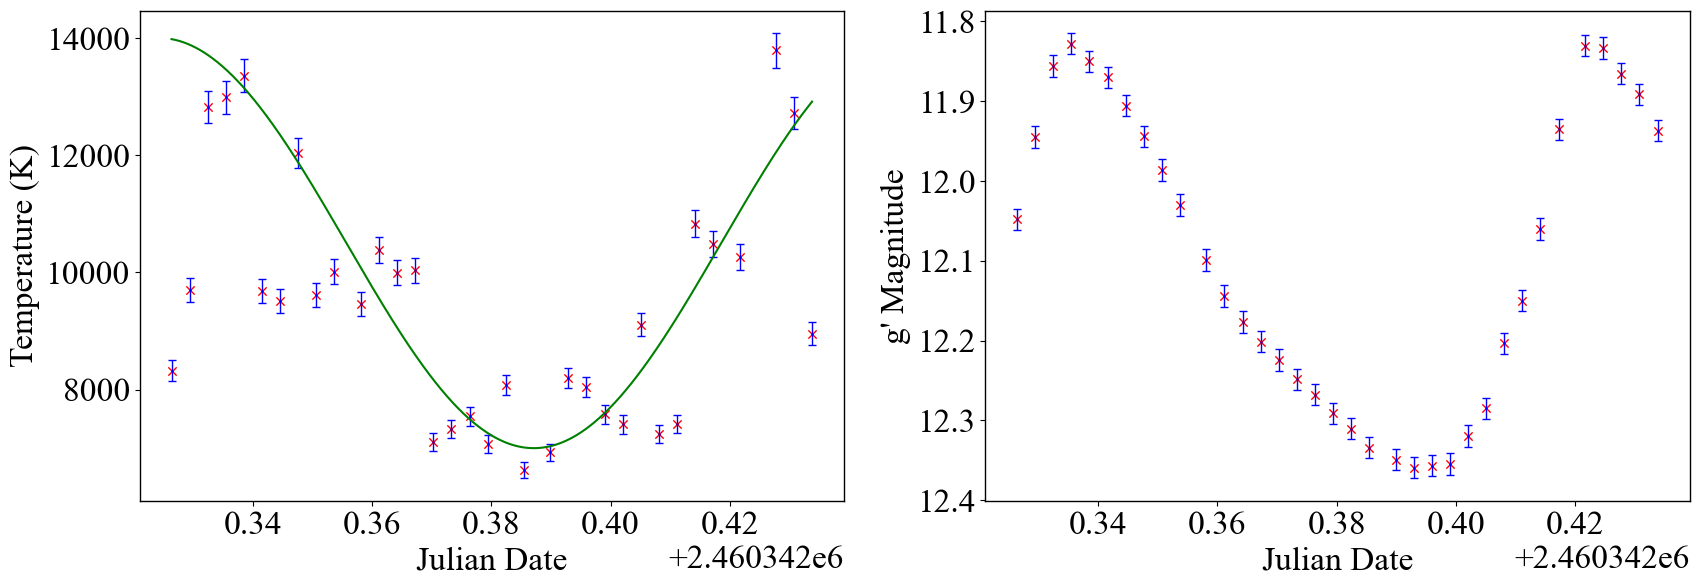

In [6]:
df = pd.read_csv('airmass/NSVS7293918/colour/temperature.csv')
data = pd.read_csv('airmass/NSVS7293918/G/cal_star_4_G_airmass.csv')

def sin(x,a,b,c,d):
    return a*(((np.sin(b*(x+c))))+d)
def quadratic(x,a,b,c,d):
    return a*(((d*(x+b))**2) + c)
x = np.linspace(np.min(df['JD']), np.max(df['JD']), 1000)
y = np.linspace(np.min(df['Temperature']), np.max(df['Temperature']), 1000)
popt, pcov = curve_fit(sin, x, y, p0 = [3500,50,0.769,3],maxfev = 1000000)


mag = np.linspace(np.min(data['Mag']), np.max(data['Mag']), 1000)
jd = np.linspace(np.min(data['JD']), np.max(data['JD']), 1000)
popt2, pcov2 = curve_fit(sin, jd, mag,p0 = [0.27,160,0.8045,44.8],maxfev = 1000000)
popt3, pcov3 = curve_fit(sin, jd, mag,p0 = [0.265,65.1,0.704,44.8],maxfev = 1000000)
popt4, pcov4 = curve_fit(sin, jd, mag,p0 = [0.30,38,0.7200795,31],maxfev = 1000000)
popt5, pcov5 = curve_fit(sin, jd, mag,p0 = [0.27,100,1.2989,44.8],maxfev = 1000000)

print(popt2)
print(popt3)
print(popt4)
print(popt5)

plt.figure(figsize=(20,14))
plt.subplot(2,2, 1)
plt.xlabel('Julian Date')
plt.ylabel('Temperature (K)')
# plt.yscale('log')
plt.errorbar(df['JD'], df['Temperature'], yerr = df['Error']*df['Temperature'], color = 'b',fmt='o',markersize = 0.5, capsize=3,linewidth = 1)
plt.scatter(df['JD'], df['Temperature'], color = 'r',marker = 'x' ,linewidth = 1)
plt.plot(x, sin(x, *popt), color = 'g')
plt.subplot(2,2, 2)
plt.xlabel('Julian Date')
plt.ylabel('g\' Magnitude')
plt.gca().invert_yaxis()
plt.errorbar(data['JD'], data['Mag'], yerr = data['error'], color = 'b',fmt='o',markersize = 0.5, capsize=3,linewidth = 1)
plt.scatter(data['JD'], data['Mag'], color = 'r',marker = 'x' ,linewidth = 1)
# plt.plot(jd, sin(jd, *popt2), color = 'g')
# plt.plot(jd, sin(jd, *popt3), color = 'pink')
# plt.plot(jd, sin(jd, *popt4), color = 'purple')
# plt.plot(jd, sin(jd, 0.267047494 ,117.00000086  , 1.255 , 45.30693318), color = 'orange')

plt.savefig('graphs/temperature.pdf', format = 'pdf',bbox_inches='tight',pad_inches=0.3)
plt.show()

# plt.figure()
# plt.scatter(df['Temperature'], df['Colour'])

In [ ]:

# x = data['JD']


# z = np.piecewise(x,
#                 [
#                  (x <= 2460342.336) * (x >= np.min(x))
#                 ,(x >  2460342.336) * (x <= 2460342.351) 
#                 ,(x > 2460342.351 ) * (x <= 2460342.401)
#                 ,(x > 2460342.401) * (x <= np.max(x))
#                 ]
#                 ,[
#                 lambda x: sin(x,0.26787494 ,160.00003378 , 0.8407345 , 45.10693318)
#                 , lambda x: sin(x,0.25215745 ,65.10000045  , 0.69151428, 47.8075843) 
#                 , lambda x: sin(x,0.34066465 ,38.00000005  , 0.724734  , 35.28029979) 
#                 , lambda x: sin(x,0.267047494 ,117.00000086  , 1.255 , 45.30693318)
#                 ])
# # z = np.piecewise((data['JD']),
# #                 [(data['JD'] < np.min(data['JD']))
# #                 ,(data['JD'] <= 2460342.336) & (data['JD'] >= np.min(data['JD']))
# #                 ,(data['JD'] >  2460342.336) & (data['JD'] <= 2460342.351) 
# #                 ,(data['JD'] < 2460342.351 ) & (data['JD'] <= 2460342.401)
# #                 ,(data['JD'] > 2460342.401) & (data['JD'] <= np.max(data['JD']))
# #                 ,(data['JD'] > np.max(data['JD']))]
# #                 ,[sin(0,0,0,0,0)
# #                 , sin(data['JD'],0.26787494 ,160.00003378 , 0.8407345 , 45.10693318)
# #                 , sin(data['JD'],0.25215745 ,65.10000045  , 0.69151428, 47.8075843) 
# #                 , sin(data['JD'],0.34066465 ,38.00000005  , 0.724734  , 35.28029979) 
# #                 , sin(data['JD'],0.267047494 ,117.00000086  , 1.255 , 45.30693318)
# #                 , sin(0,0,0,0,0)])
# plt.plot(x, z)

# z = np.piecewise(x,
#                 [
#                  (x <= 2460342.336) * (x >= np.min(x)),
#                  (x >  2460342.336) * (x <= 2460342.351),
#                  (x > 2460342.351 ) * (x <= 2460342.401),
#                  (x > 2460342.401) * (x <= np.max(x))
#                 ],
#                 [
#                 lambda x: sin(x, 0.26787494, 160.00003378, 0.8407345, 45.10693318),
#                 lambda x: sin(x, 0.25215745, 65.10000045, 0.69151428, 47.8075843),
#                 lambda x: sin(x, 0.34066465, 38.00000005, 0.724734, 35.28029979),
#                 lambda x: sin(x, 0.267047494, 117.00000086, 1.255, 45.30693318)
#                 ])


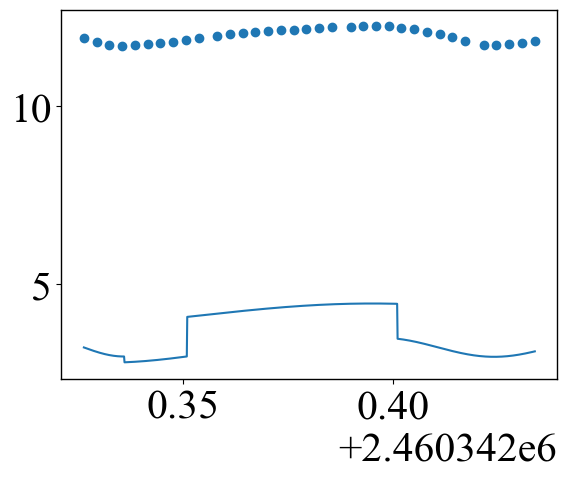

In [ ]:
def sin(x, a, b, c, d):
    return a*(((np.sin(b*(x+c))))+d)

x = np.linspace(np.min(data['JD']), np.max(data['JD']), 1000)
z = np.piecewise(x,
                [
                 (x <= 2460342.336) * (x >= np.min(x)),
                 (x >  2460342.336) * (x <= 2460342.351),
                 (x > 2460342.351 ) * (x <= 2460342.401),
                 (x > 2460342.401) * (x <= np.max(x))
                ],
                [
                lambda x: sin(x, 0.26787494, 160.00003378, 0.8407345, 12.095),
                lambda x: sin(x, 0.25215745, 65.10000045, 0.69151428, 12.095),
                lambda x: sin(x, 0.34066465, 38.00000005, 0.724734, 12.095),
                lambda x: sin(x, 0.267047494, 117.00000086, 1.255, 12.095)
                ])

plt.plot(jd, z)
plt.scatter(data['JD'],data['Space Mag'])

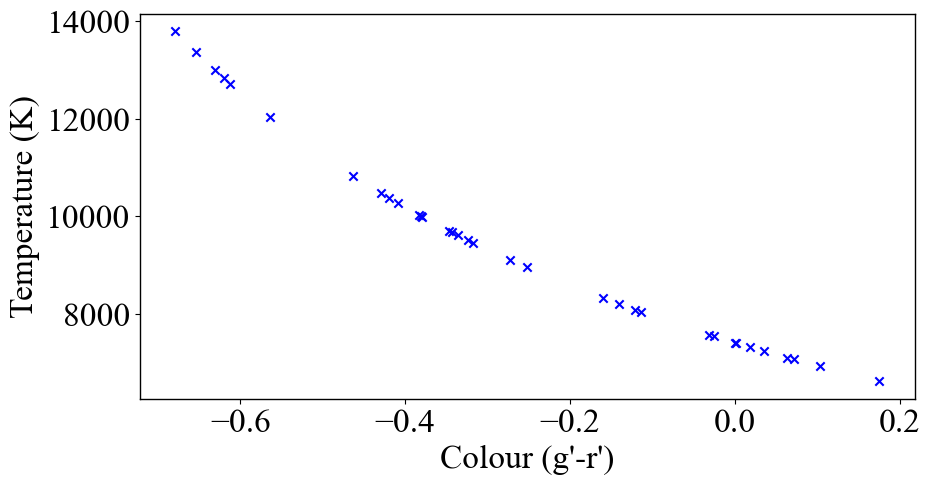

In [20]:

df = pd.read_csv('airmass/NSVS7293918/colour/temperature.csv')

def exp(x,a,b,c):
    return a*np.exp(b*x+c)
                    
# x = np.linspace(np.min(df['Colour']), np.max(df['Colour']), 1000)
# y = np.linspace(np.max(df['Temperature']), np.min(df['Temperature']), 1000)
# popt, pcov = curve_fit(exp, x, y, p0 = [5000,-0.0001,0.2],maxfev = 1000000)

# print(popt)
plt.figure(figsize=(10,5))
plt.xlabel('Colour (g\'-r\')')
plt.ylabel('Temperature (K)')
plt.scatter(df['Colour'],df['Temperature'], color = 'b', label = 'data',marker='x')
# plt.plot(x, exp(x, *popt))
plt.savefig('graphs/colour_temperature.pdf', format = 'pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()


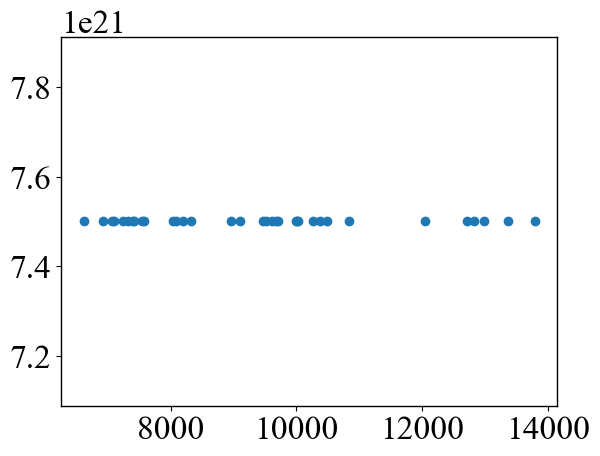

In [18]:
df = pd.read_csv('airmass/NSVS7293918/colour/temperature.csv')
y = np.full_like(df['Temperature'], 7.5e21)
plt.scatter(df['Temperature'], y)